armchairを計算してみよう

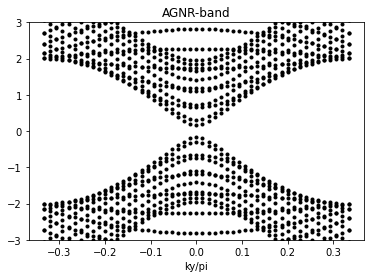

In [88]:
import numpy
import math
import matplotlib.pyplot as plt
import numpy as np

#zigzag nanoribbon
'calculate band dispersion along Gamma Y'
sample=51
t=2.0
a=2.0

modelsize=11

kpoint=numpy.linspace(-1/3/a,1/3/a,sample)

tot=[]

for ky in kpoint:
    
    kya=ky*numpy.pi*a

    beta=t*np.exp(-1.0j*kya*0.5)
    beta_star=t*np.exp(1.0j*kya*0.5)
    gamma=t*np.exp(-1.0j*kya)
    gamma_star=t*np.exp(1.0j*kya)

    '4x4 matrix for upper'
    upper=[[0.0, beta_star, 0.0,0.0],
            [0.0, 0.0, 0.0, 0.0],
            [0.0,0.0,0.0,0.0],
            [0.0,0.0,beta, 0.0]
            ]
    '4x4 matrix for lower'
    lower=[[0.0, 0.0, 0.0,0.0],
            [beta, 0.0,0.0,0.0],
            [0.0,0.0,0.0,beta_star],
            [0.0,0.0,0.0,0.0]
            ]
    '4x4 matrix for other diagonal block'
    diag=[[0.0, beta_star, 0.0, gamma],
          [beta, 0.0, gamma_star, 0.0],
          [0.0,gamma, 0.0, beta_star],
          [gamma_star, 0.0, beta, 0.0]
            ]
    
    'fill the matrix'
    matrix=numpy.zeros(((modelsize)*4,(modelsize)*4),dtype=np.complex64)
    
    for i in range(modelsize):
        for j in range(modelsize):
            if j==i:
                matrix[j*4:(j+1)*4, i*4:(i+1)*4 ]=diag
            elif j==i-1:
                matrix[j*4:(j+1)*4, i*4:(i+1)*4 ]=upper
            elif j==i+1:
                matrix[j*4:(j+1)*4, i*4:(i+1)*4 ]=lower
                
                    
    A=numpy.mat(matrix)
    (l,v)=numpy.linalg.eig(A)
    result=[kya,l,v]
    tot.append(result)

klist=([x[0]/math.pi for x in tot])

#print(tot[0][1][2])
'plotting the band structure'

for i in range(modelsize*4):
    eigenval=[]
    for j in range(len(klist)):
        eigenval.append(tot[j][1][i].real)
    
    plt.plot(klist,eigenval,'.',color="0")

plt.xlabel("ky/pi") 
titleString="AGNR-band"
plt.title(titleString)

plt.ylim(-3,3)
plt.savefig('AGNR.png',dpi=600)
plt.show()

In [89]:
kya=0
t=10
beta=t*np.exp(-1.0j*kya*0.5)
beta_star=t*np.exp(1.0j*kya*0.5)
gamma=t*np.exp(-1.0j*kya)
gamma_star=t*np.exp(1.0j*kya)

'4x4 matrix for upper'
upper=[[0.0, beta_star, 0.0,0.0],
        [0.0, 0.0, 0.0, 0.0],
        [0.0,0.0,0.0,0.0],
        [0.0,0.0,beta, 0.0]
        ]
'4x4 matrix for lower'
lower=[[0.0, 0.0, 0.0,0.0],
        [beta, 0.0,0.0,0.0],
        [0.0,0.0,0.0,beta_star],
        [0.0,0.0,0.0,0.0]
        ]
'4x4 matrix for other diagonal block'
diag=[[0.0, beta_star, 0.0, gamma],
        [beta, 0.0, gamma_star, 0.0],
        [0.0,gamma, 0.0, beta_star],
        [gamma_star, 0.0, beta, 0.0]
        ]

'fill the matrix'
matrix=numpy.zeros(((modelsize)*4,(modelsize)*4),dtype=np.complex64)
for i in range(modelsize):
        for j in range(modelsize):
                if j==i:
                        matrix[j*4:(j+1)*4, i*4:(i+1)*4 ]=diag
                elif j==i-1:
                        matrix[j*4:(j+1)*4, i*4:(i+1)*4 ]=upper
                elif j==i+1:
                        matrix[j*4:(j+1)*4, i*4:(i+1)*4 ]=lower
                
                    
A=numpy.mat(matrix)


In [90]:
A

matrix([[ 0.+0.j, 10.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
        [10.+0.j,  0.+0.j, 10.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j, 10.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
        ...,
        [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j, 10.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, ..., 10.+0.j,  0.+0.j, 10.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j, 10.+0.j,  0.+0.j]],
       dtype=complex64)

In [91]:
(l,v)=numpy.linalg.eig(A)
l

array([ 29.813719  +0.j,  29.258347  +0.j,  28.344227  +0.j,
       -29.813719  +0.j, -29.258347  +0.j, -28.344227  +0.j,
        27.088388  +0.j, -27.088388  +0.j,  25.514225  +0.j,
       -25.514225  +0.j,  23.651062  +0.j, -23.651062  +0.j,
        21.533606  +0.j, -21.533606  +0.j,  19.201302  +0.j,
       -19.201302  +0.j,  16.697592  +0.j, -16.697592  +0.j,
        14.06912   +0.j, -14.06912   +0.j,  11.364848  +0.j,
       -11.364848  +0.j,   9.813719  +0.j,   9.258346  +0.j,
         8.344226  +0.j,   8.635152  +0.j,   7.088388  +0.j,
         5.9308796 +0.j,   5.514226  +0.j,   3.651063  +0.j,
         3.3024077 +0.j,   1.5336064 +0.j,   0.79869926+0.j,
        -0.79869926+0.j,  -1.5336064 +0.j,  -3.3024077 +0.j,
        -3.651063  +0.j,  -9.813719  +0.j,  -9.258346  +0.j,
        -8.344226  +0.j,  -8.635152  +0.j,  -5.514226  +0.j,
        -5.9308796 +0.j,  -7.088388  +0.j], dtype=complex64)